In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
from skimage.color import rgb2gray,gray2rgb
from sklearn.decomposition import PCA

# Importing images
<ul>
    <li>Import kmean image related to your student number: <a href="https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/">imread</a></li>
    
</ul>

In [2]:
###########Code Here
path = r'E:\Images\Kmean\9906094.jpg'
image1 = cv2.imread(path)
###########

# Preprocessing data
<ul>
    <li>Convert BGR to RGB: <a href="https://www.geeksforgeeks.org/python-opencv-cv2-cvtcolor-method/">cvtColor</a></li>
    <li>Plotting red,blue,green data using ax variable: <a href="https://www.w3schools.com/python/python_ml_scatterplot.asp">scatter</a></li>
    <li>Showing base image: <a href="https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/">imshow</a></li>
</ul>

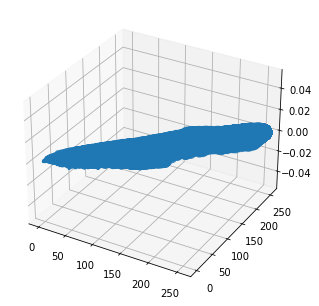

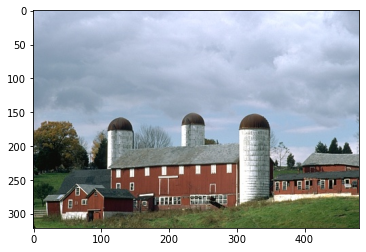

In [3]:
###########Code Here
base = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
###########

r, g, b = cv2.split(base)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
###########Code Here
plt.scatter(r,g,b)
###########


plt.show()



###########Code Here
plt.imshow(base)



plt.show()


<h2>Create standard data for K-means</h2>
<ul>
    <li>Reshaping the base image to a 2D array of pixels and 3 color values (RGB) using reshape method: <a href="https://numpy.org/doc/stable/reference/generated/numpy.reshape.html">reshape</a></li>
    
</ul>

In [4]:

print(base.shape)


###########Code Here
pixel_values =np.reshape(base,(154401, 3)) 
###########


print(pixel_values.shape)
# convert to float
pixel_values = np.float32(pixel_values)




(321, 481, 3)
(154401, 3)


<h2>Kmeans criteria:</h2>
In this section, we set a Kmeans criteria. it means after satisfying which conditions, the algorithm would stop.
<ol>
    <li>Number of iteration = 10000</li>
    <li>Epsilon = 0.001</li>
</ol>

In [5]:

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.001)


<h2>Creating ellbow plot</h2>
<ol>
    <li>Number of attempts = 10 : run kmeans with 10 different initial points</li>
    <li>Run kmeans with k clusters and above criteria: <a href="https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html">cv2.kmeans</a></li>
    <li>Plot clusters error for 1 to k cluster</li>
</ol>

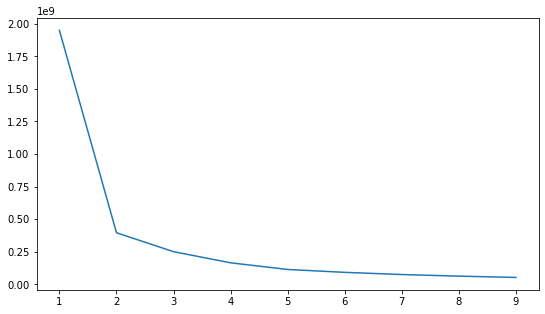

In [6]:
a = []
attempts = 10
for k in range(1,10):
    ###########Code Here
    error, labels, (centers) =cv2.kmeans(pixel_values,k,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS) 
    ###########
    a.append(error)
plt.figure(figsize=(9, 5))
x=np.arange(1,k+1)
plt.plot(x,a)
plt.show()


In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.
<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png"></img>

<h2>Choosing best K for number of clusters from above elbow plot: ?4</h2>
<ul>
    <li>Choose best k for number of clusters:</li>
    <li>Run kmeans with k clusters and previous criteria: <a href="https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html">cv2.kmeans</a></li>
    
</ul>

In [7]:
###########Code Here
########### Set k and attempts whatever you want
k = 2
attempts =10 
_, labels, (centers) = cv2.kmeans(pixel_values,k,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
###########

# Ploting segmented image
<ul>
    <li>Creating centers' colors matrix : specific color(RGB) for every center</li>
    <li>Creating segmented_image from centers and labels</li>
    <li>Ploting segmented_image</li>
    
</ul>

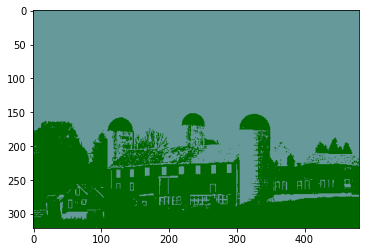

In [8]:
centers=[
    [0,102,0],
    [102, 153, 153],
    [51, 102, 204],
    [0, 0, 153],
    [153, 0, 255],
    [102, 255, 102],
    [255, 255, 102],
    [255, 0, 102],
    [255, 255, 255],
    [51, 153, 255]
]
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(base.shape)
plt.imshow(segmented_image)
plt.show()

# Importing new library

In [2]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# Importing your own image
<ul>
    <li>Import Grayscale image: <a href="https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/">cv2.IMREAD_GRAYSCALE</a></li>
    <li>Show Grayscale image</li>
    <li>Converting Grayscale into Black&White: <a href="https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/">cv2.IMREAD_GRAYSCALE</a></li>
    <li>Creating a mask for image2 with True instead of 1 and False instead of 0 in image2 </li>
</ul>
We use mentioned mask to create a graph from specific pixels instead of all pixels (For complexity issues).

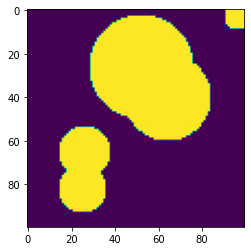

In [5]:
###########Code Here
path = r'E:/Images/Spectral/9906094.jpg'
image2 = cv2.imread(path,0)

#show image
plt.imshow(image2 )
plt.plot()

###########

#convert into black and white
thresh = 128

###########Code Here
# threshold image
_,image2 = cv2.threshold(image2 ,thresh,300,cv2.THRESH_BINARY)

###########

# mask of image2
mask = image2.astype(bool)

# Creating graph for image2 with created mask
<ul>
    <li>Use the img_to_graph function of an image library to create a graph of pixels: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.image.img_to_graph.html">image.img_to_graph</a></li>
    <li>Use similarity function for weights of graph</li>
    
</ul>

In [6]:
###########Code Here
graph = image.img_to_graph(image2,mask=mask)
###########

graph.data = np.exp(-graph.data / graph.data.std())


# Use spectral_clustering
<ul>
    <li>Use spectral_clustering function(it returns labels) :<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.spectral_clustering.html">spectral_clustering</a></li>
    <li>Set assign_labels in spectral_clustering's parameters to 'kmeans'</li>
    <li>Set n_clusters in spectral_clustering's parameters to the best value related to your specific image</li>
    
</ul>

In [7]:
###########Code Here
labels =spectral_clustering(graph, n_clusters=5, eigen_solver='arpack')
###########

C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


# Ploting segmented image
<ul>
    <li>Creating matrix with shape of mask and value of -1 : -1 because of background-color</li>
    <li>Change every yellow index of image2 with new colors in labels</li>
    
</ul>

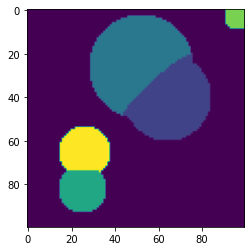

In [8]:
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels
plt.imshow(label_im)